## Basic

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_PATH = Path("../../data/gtfs")

stops = pd.read_csv(DATA_PATH / "stops.txt")
stops.describe()

# stop_times = pd.read_csv(DATA_PATH / "stop_times.txt")
# stop_times['stop_headsign'].unique()
# stop_times[~stop_times['stop_headsign'].isna()].head()
# stop_times.head()
# stop_times.describe()

# routes = pd.read_csv(DATA_PATH / "routes.txt")
# routes['route_type'].unique()
# routes.groupby('route_type').agg(lambda x: x.iloc[0])

# routes[routes['route_color'] == '3f2682']

# shapes = pd.read_csv(DATA_PATH / "shapes.txt")
# shapes.head(20)

# trips = pd.read_csv(DATA_PATH / "trips.txt")
# grouped_trips = trips.groupby('route_id').agg(lambda x: len(list(x)))
# grouped_trips

,stop_code,stop_lat,stop_lon,location_type,wheelchair_boarding
count,3702.000000,5495.000000,5495.000000,5495.000000,5495.000000
mean,19709.149919,43.588655,1.424826,0.326297,1.206005
std,18184.871815,0.063775,0.079498,0.468900,0.404471
min,10.000000,43.391117,1.161978,0.000000,1.000000
25%,6740.250000,43.550896,1.369984,0.000000,1.000000
50%,16200.500000,43.592516,1.429942,0.000000,1.000000
75%,24485.250000,43.630807,1.480234,1.000000,1.000000
max,91011.000000,43.749902,1.690543,1.000000,2.000000


In [4]:
import geopandas as gpd

# Load the GeoPackage file
gdf = gpd.read_file("../data/po_toulouse/toulouse_activities.gpkg")

gdf.to_file("../GAMA/CityTransport/includes/toulouse_activities.shp")
gdf.to_file("../GAMA/CityTransport/includes/toulouse_activities.geojson", driver='GeoJSON')

# # Print the first few rows
# print(gdf.head())
print(gdf['purpose'].unique())

gdf[gdf['purpose'] == 'education'].head()

/var/folders/wy/19hmjgc57ssck07jnj6pz2x00000gn/T/ipykernel_50201/679897538.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("../GAMA/CityTransport/includes/toulouse_activities.shp")
/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'household_id' to 'household_'
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'activity_index' to 'activity_i'
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'departement_id' to 'departemen'
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'preceding_trip_index' 

['home' 'work' 'shop' 'other' 'education' 'leisure']


,person_id,household_id,activity_index,iris_id,commune_id,departement_id,region_id,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,geometry
47,16528,8304,1,091220102,09122,09,76,0,1,education,27688.0,42688.0,False,False,POINT (586215.02 6207280.6)
49,16528,8304,3,091220102,09122,09,76,2,3,education,50488.0,60688.0,False,False,POINT (586215.02 6207280.6)
61,17453,8748,1,090710000,09071,09,76,0,1,education,31993.0,43453.0,False,False,POINT (577543.79 6213592.05)
63,17453,8748,3,090710000,09071,09,76,2,3,education,49753.0,61273.0,False,False,POINT (577543.79 6213592.05)
78,17456,8748,1,821950000,82195,82,76,0,1,education,23450.0,59450.0,False,False,POINT (563058.304 6332686.965)


In [ ]:
import geopandas as gpd

# Load the GeoPackage file
gdf = gpd.read_file("../data/po_toulouse/toulouse_commutes.gpkg")

# Print the first few rows
print(gdf.head())

[20250303 20250304 20250305 20250306 20250307 20250310 20250311 20250312
 20250313 20250314 20250317 20250318 20250319 20250320 20250321 20250324
 20250325 20250326 20250327 20250328 20250308 20250309 20250315 20250316
 20250322 20250323 20250329 20250330 20250331 20250401 20250402 20250403
 20250404 20250405 20250406]
  service_id      date  exception_type  route_type  route_id    trip_id
0    1264717  20250303               1         3.0  line:230  1963612.0
1    1264717  20250304               1         3.0  line:230  1963612.0
2    1264717  20250305               1         3.0  line:230  1963612.0
3    1264717  20250306               1         3.0  line:230  1963612.0
4    1264717  20250307               1         3.0  line:230  1963612.0
Unique route types: [ 3.  1.  6.  0. nan]
       date route_type  count
0  20250303       Tram    390
1  20250303      Metro   1816
2  20250303        Bus   9014
3  20250303     Teleo,   1006
4  20250304       Tram    390


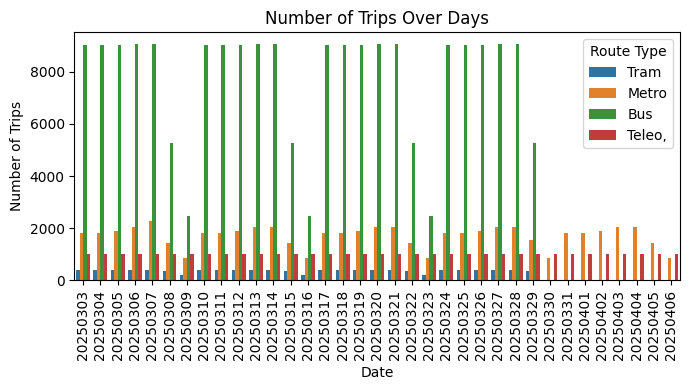

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path("../../data/gtfs")

calendar_dates = pd.read_csv(DATA_PATH / "calendar_dates.txt")
print(calendar_dates['date'].unique())
calendar_dates['date'] = calendar_dates['date'].astype(str)
# calendar_dates = calendar_dates[calendar_dates['date'] <= '20250325'] 
# calendar_dates = calendar_dates[calendar_dates['date'] >= '20250512']

trips = pd.read_csv(DATA_PATH / "trips.txt")
routes = pd.read_csv(DATA_PATH / "routes.txt")
# Merge trips with routes to get route information
trips_routes = trips.merge(routes, on='route_id', how='left')
# Merge calendar_dates with trips to get service information
calendar_dates_trips = calendar_dates.merge(trips_routes[['route_type', 'service_id', 'route_id', 'trip_id']], on='service_id', how='left')

print(calendar_dates_trips.head())

route_type_list = calendar_dates_trips['route_type'].unique()
print("Unique route types:", route_type_list)

# Count the number of unique routes for each route type by date
route_type_counts = calendar_dates_trips.groupby(['date', 'route_type']).size().reset_index(name='count')
route_type_counts

_m = {
    0: 'Tram',
    1: 'Metro',
    3: 'Bus',
    6: 'Teleo,'
}
route_type_counts['route_type'] = route_type_counts['route_type'].map(_m)
print(route_type_counts.head())

# draw the counts for each route type over time using sns

plt.figure(figsize=(7, 4))
sns.barplot(data=route_type_counts, x='date', y='count', hue='route_type')
plt.title('Number of Trips Over Days')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.legend(title='Route Type')
plt.tight_layout()


/var/folders/wy/19hmjgc57ssck07jnj6pz2x00000gn/T/ipykernel_17857/3772464316.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv(DATA_PATH / "stop_times.txt")
/var/folders/wy/19hmjgc57ssck07jnj6pz2x00000gn/T/ipykernel_17857/3772464316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_12_stop_times['hour'] = date_12_stop_times['departure_time'].str.split(':').str[0].astype(int)
/var/folders/wy/19hmjgc57ssck07jnj6pz2x00000gn/T/ipykernel_17857/3772464316.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hou

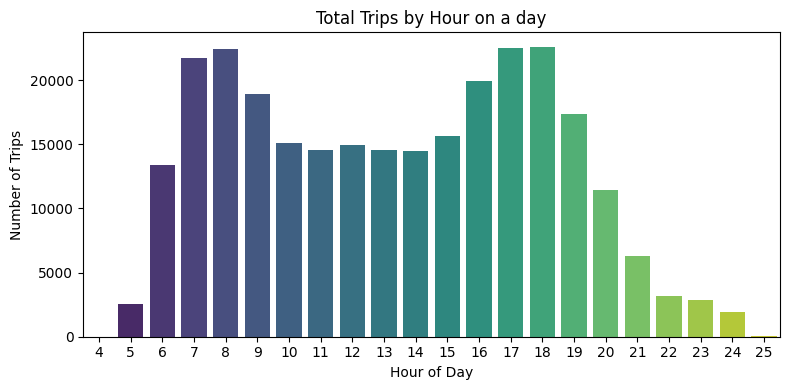

In [18]:
# Wenesday, March 12, 2025
single_date_trips = calendar_dates_trips[calendar_dates_trips['date'] == '20250310']
# Sunday, March 15, 2025
# single_date_trips = calendar_dates_trips[calendar_dates_trips['date'] == '20250315']

# Load stop_times to get departure times
stop_times = pd.read_csv(DATA_PATH / "stop_times.txt")

# Merge with trips to get only trips for date '20250512'
date_12_trip_ids = single_date_trips['trip_id'].unique()
date_12_stop_times = stop_times[stop_times['trip_id'].isin(single_date_trips['trip_id'])]

# Extract hour from 'departure_time'
date_12_stop_times['hour'] = date_12_stop_times['departure_time'].str.split(':').str[0].astype(int)

# Count trips by hour
hourly_counts = date_12_stop_times.groupby('hour').size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=hourly_counts, x='hour', y='trip_count', palette='viridis')
plt.title('Total Trips by Hour on a day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()